# LUNG CANCER PREDICTION

In [189]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [80]:
# Load dataset
df=pd.read_csv('data/survey-lung-cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [82]:
#Drop Duplicates
df=df.drop_duplicates()
#Drop null rows
df=df.dropna()

In [84]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [88]:
# Performing preprocessing on data
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC_DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL_CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS_OF_BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING_DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST_PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [90]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,...,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,CHRONIC_DISEASE,ALCOHOL_CONSUMING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1,69,0,1,1,0,1,1,0,1,...,1,2,2,2,1,0,1,1,1,1
1,1,74,1,0,0,0,2,1,1,0,...,0,2,2,2,1,1,0,1,1,1
2,0,59,0,0,0,1,1,1,0,1,...,1,2,1,2,0,0,0,1,0,1
3,1,63,1,1,1,0,1,0,0,0,...,0,1,2,2,0,0,1,0,1,1
4,0,63,0,1,0,0,1,0,0,1,...,1,2,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,1,0,1,1,...,1,1,2,1,1,0,0,0,1,0
280,0,59,1,0,0,0,2,1,1,0,...,0,2,1,1,0,1,0,1,0,0
281,1,55,1,0,0,0,1,1,1,0,...,0,2,1,2,0,0,0,1,0,1
282,1,46,0,1,1,0,1,0,0,0,...,0,1,2,2,0,0,0,0,1,1


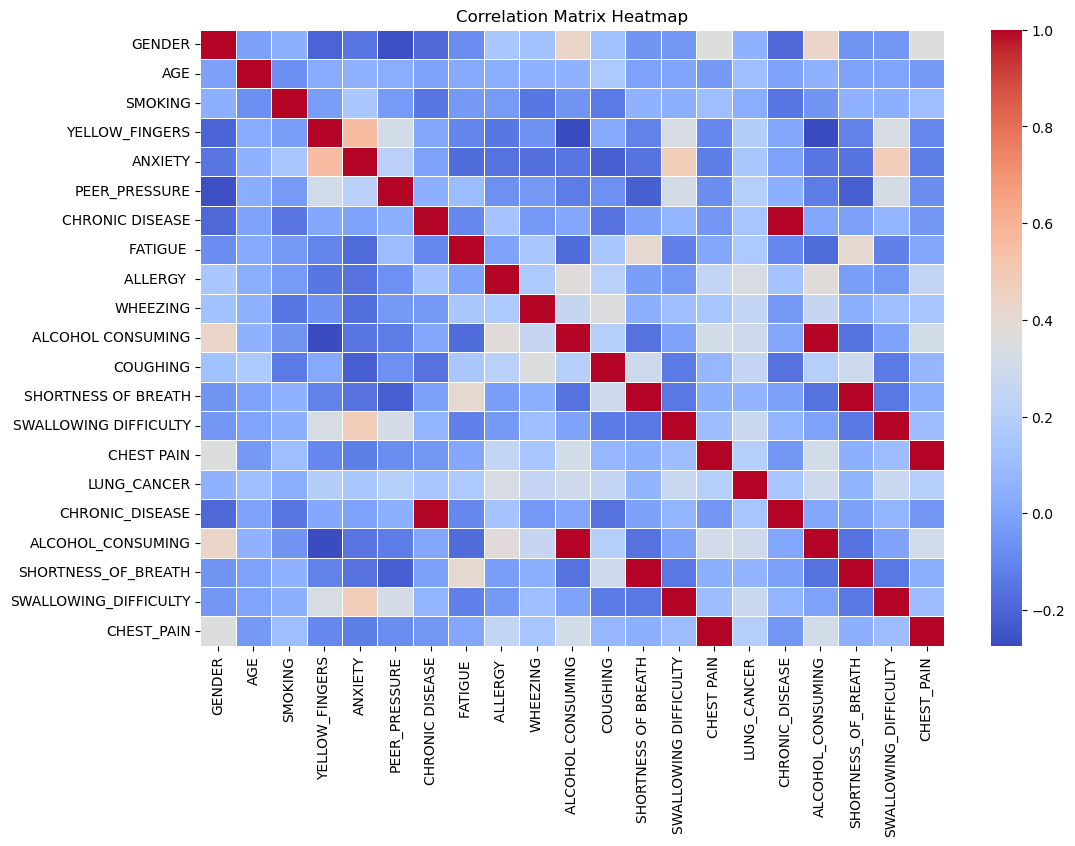

In [92]:
corr= df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

In [93]:
## Extracting high correlation fields
df_new = df[['ANXIETY', 'YELLOW_FINGERS', 'SWALLOWING_DIFFICULTY', 'GENDER', 'SHORTNESS_OF_BREATH', 'ALCOHOL_CONSUMING', 'COUGHING', 'CHEST_PAIN', 'LUNG_CANCER']]

df_new

,ANXIETY,YELLOW_FINGERS,SWALLOWING_DIFFICULTY,GENDER,SHORTNESS_OF_BREATH,ALCOHOL_CONSUMING,COUGHING,CHEST_PAIN,LUNG_CANCER
0,1,1,1,1,1,1,1,1,1
1,0,0,1,1,1,0,0,1,1
2,0,0,0,0,1,0,1,1,0
3,1,1,1,1,0,1,0,1,0
4,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,0,1,0,1
280,0,0,0,0,1,0,0,0,0
281,0,0,0,1,1,0,0,1,0
282,1,1,1,1,0,0,0,1,0


In [96]:
df_new.corr()

,ANXIETY,YELLOW_FINGERS,SWALLOWING_DIFFICULTY,GENDER,SHORTNESS_OF_BREATH,ALCOHOL_CONSUMING,COUGHING,CHEST_PAIN,LUNG_CANCER
ANXIETY,1.000000,0.558344,0.478820,-0.152032,-0.155678,-0.152228,-0.218843,-0.123182,0.144322
YELLOW_FINGERS,0.558344,1.000000,0.333349,-0.202506,-0.109959,-0.273643,0.020803,-0.099169,0.189192
SWALLOWING_DIFFICULTY,0.478820,0.333349,1.000000,-0.048959,-0.140307,-0.000635,-0.136885,0.102674,0.268940
GENDER,-0.152032,-0.202506,-0.048959,1.000000,-0.052893,0.434264,0.120228,0.361547,0.053666
SHORTNESS_OF_BREATH,-0.155678,-0.109959,-0.140307,-0.052893,1.000000,-0.163370,0.284968,0.044029,0.064407
ALCOHOL_CONSUMING,-0.152228,-0.273643,-0.000635,0.434264,-0.163370,1.000000,0.198023,0.310767,0.294422
COUGHING,-0.218843,0.020803,-0.136885,0.120228,0.284968,0.198023,1.000000,0.077988,0.253027
CHEST_PAIN,-0.123182,-0.099169,0.102674,0.361547,0.044029,0.310767,0.077988,1.000000,0.194856
LUNG_CANCER,0.144322,0.189192,0.268940,0.053666,0.064407,0.294422,0.253027,0.194856,1.000000


Text(0.5, 1.0, 'ALCOHOL CONSUMING')

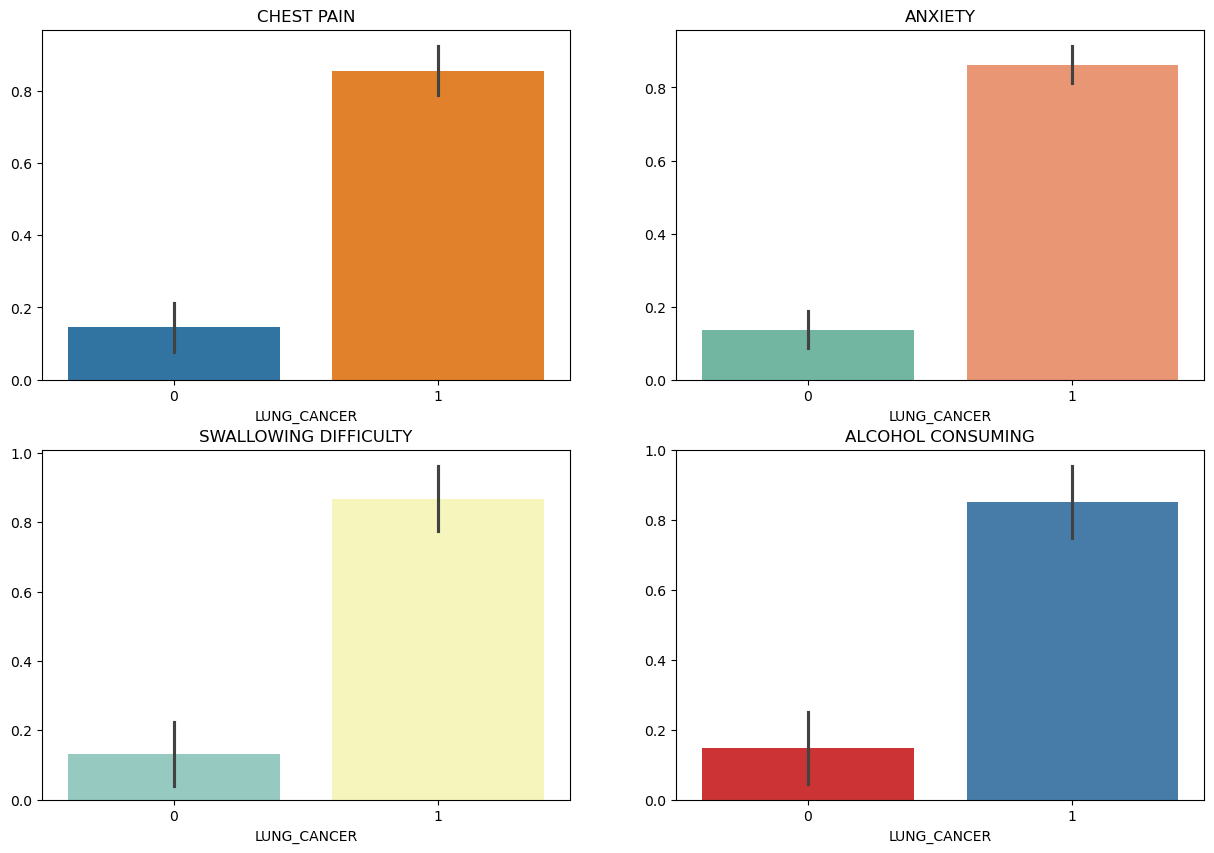

In [217]:
# Subplotting lung cancer presence on various factors
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
df_0=df.groupby('CHEST_PAIN')['LUNG_CANCER'].value_counts(normalize=True).unstack()
sns.barplot(df_0, ax=axes[0][0])
axes[0][0].set_title('CHEST PAIN')
df_1=df.groupby('ANXIETY')['LUNG_CANCER'].value_counts(normalize=True).unstack()
sns.barplot(df_1, ax=axes[0][1], palette = "Set2")
axes[0][1].set_title('ANXIETY')
df_2=df.groupby('SWALLOWING_DIFFICULTY')['LUNG_CANCER'].value_counts(normalize=True).unstack()
sns.barplot(df_2, ax=axes[1][0], palette = "Set3")
axes[1][0].set_title('SWALLOWING DIFFICULTY')
df_3=df.groupby('ALCOHOL CONSUMING')['LUNG_CANCER'].value_counts(normalize=True).unstack()
sns.barplot(df_3, ax=axes[1][1], palette = "Set1")
axes[1][1].set_title('ALCOHOL CONSUMING')


In [98]:
#Splitting data for training and testing

X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [100]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

In [102]:
print(f"Validation Mean Average Error: {mae:.2f}")
print(f"Validation Mean Square Error: {mse:.2f}")

Validation Mean Average Error: 0.22
Validation Mean Square Error: 0.09


In [104]:
# Look for important features
coefficients = model.coef_

feat_importance = pd.DataFrame({'Column': X.columns, 'Coefficient': coefficients})

print(feature_importance)

                  Column  Coefficient
5      ALCOHOL_CONSUMING     0.264301
2  SWALLOWING_DIFFICULTY     0.140256
6               COUGHING     0.134644
4    SHORTNESS_OF_BREATH     0.112488
7             CHEST_PAIN     0.099095
1         YELLOW_FINGERS     0.097394
0                ANXIETY     0.055692
3                 GENDER    -0.092180


In [106]:
# Build Linear Regression Model
lr=LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [112]:
y_lr_pred= lr.predict(X_test)
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.93      0.93      0.93        60

    accuracy                           0.88        69
   macro avg       0.74      0.74      0.74        69
weighted avg       0.88      0.88      0.88        69



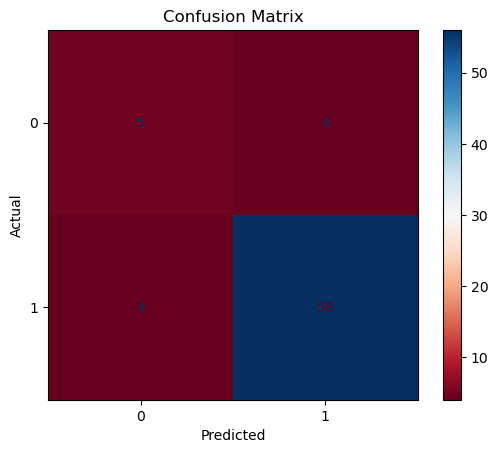

In [116]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_lr_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.RdBu)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [118]:
Accuracy = accuracy_score(y_test, y_lr_pred)
Accuracy

0.8840579710144928

In [120]:
precision = precision_score(y_test, y_lr_pred)
precision

0.9333333333333333

In [129]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print(ridge.score(X_test, y_test)) 

0.2249405849677284


In [144]:
# Exploring alphas with Ridge regression
alpha_values = [0.1, 1, 10, 50, 100, 500, 1000]

results = []

# Looping through different alpha values and compute score
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train) 
    score = ridge.score(X_test, y_test)  
    results.append({"Alpha": alpha, "Ridge R² Score": score})

ridge_df = pd.DataFrame(results)
print(ridge_df)

    Alpha  Ridge R² Score
0     0.1        0.220632
1     1.0        0.224941
2    10.0        0.246167
3    50.0        0.220678
4   100.0        0.173992
5   500.0        0.059613
6  1000.0        0.032215


In [173]:
# Hyper parameter evaluation with Ridge regression

alphas = {'alpha':[1e-2,1,5,10,20,30,50,100]}
gridSearch = GridSearchCV(ridge, alphas, scoring='neg_mean_squared_error', cv=5)
gridSearch.fit(X,y)
print("Best value for lambda : ",gridSearch.best_params_)
print("Best score for cost function: ", gridSearch.best_score_)

Best value for lambda :  {'alpha': 10}
Best score for cost function:  -0.09639440265782655


<Axes: ylabel='Density'>

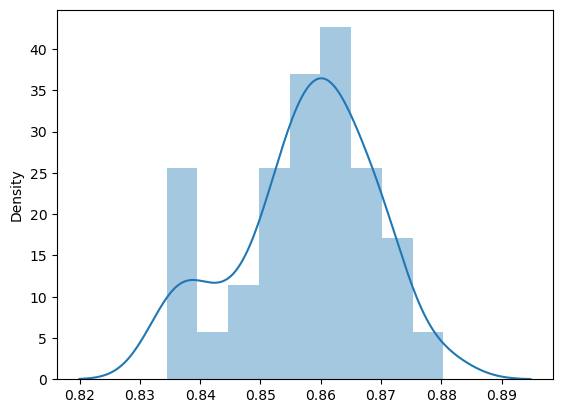

In [181]:
# Calculate ridge prediction
ridge_predict = ridge.predict(X_test)
ridge_predict
sns.distplot(ridge_predict)

In [152]:
# Applying random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
print(rf_regressor.score(X_test, y_test))


0.20072344981036383


In [162]:
# Applying SVM regressor

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_regressor.fit(X_train_sc, y_train)

print(svm_regressor.score(X_test_sc, y_test))

-0.009515662203358977


# From above observation we can see that Logistic regression out performs 